The dataset columns are as follows:

* Title: The movie's title
* Genre: The movie's genre
* Stars: The number of famous actors in the movie
* Runtime: The length of the movie's runtime
* Budget: How much was spent on filming the movie (in millions)
* Promo: How much money was spent promoting the movie (in millions)
* Season: The season in which the movie was released
* Rating: The movie's rating
* R1: Reviewer 1's review
* R1: Reviewer 2's review
* R1: Reviewer 3's review

And the target variable:

* Success: Whether the film was a success or a flop

# Data loading

In [272]:
import pandas as pd
import scipy as sp
import seaborn as sns
import numpy as np
from textblob import TextBlob
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

movie_df = pd.read_csv("movie_dataset.csv", index_col=0)

# Remove quotes from string columns
for col in movie_df.columns:
    if movie_df[col].dtype == 'object':
        movie_df[col] = movie_df[col].astype(str).str.strip('"')

movie_df

,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,R1,R2,R3,Success
0,Love in the Inbox,126,1,2020,6.679387e+07,73.543754,Winter,PG,Romantic Comedy,An unconvincing portrayal of suspense that fai...,An uninspired plotline that lacks coherence an...,A visually captivating masterpiece that mesmer...,False
1,Coffee Shop Serendipity,131,0,2020,4.667863e+01,33.572003,Fall,PG,Romantic Comedy,A movie that feels disjointed and fails to con...,An attempt at humor that lacks cleverness and ...,A timeless classic that continues to enchant a...,False
2,The Wedding Date Dilemma,132,4,2000,3.639134e+01,54.561523,Summer,PG,Romantic Comedy,An underwhelming cinematic effort with unconvi...,An emotionally resonant movie that connects un...,A cinematic triumph that surpasses boundaries ...,False
3,Heartstrings and Highways,132,1,2015,9.324732e+01,59.714535,Winter,PG13,Romantic Comedy,A film that fails to resonate due to its lack ...,A beautifully crafted narrative that unfolds w...,An uninspired portrayal of drama that feels su...,False
4,Falling for Cupid,119,1,2015,9.213021e+01,67.643810,Fall,PG13,Romantic Comedy,A movie that struggles to evoke any genuine em...,"A testament to the power of storytelling, leav...",An uplifting film that leaves a profound impac...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Shadow Strike,128,3,2021,6.489702e+01,91.445593,Fall,PG,Action,Weak and contrived dialogue that lacks authent...,An overemphasis on spectacle over substance th...,Unremarkable cinematography that fails to crea...,False
536,Riot Protocol,123,1,2018,3.098935e+01,46.045408,Summer,R,Action,A film that lingers in the memory.,A celebration of life and its intricacies.,A cinematic tour de force that enchants.,True
537,Deadlock Vendetta,121,1,2003,4.857255e+01,63.660912,Summer,PG,Action,A lack of cohesion in the storytelling that ma...,An overly convoluted plot that confuses rather...,Flat and unconvincing performances that fail t...,False
538,Blade Runner Protocol,124,1,2007,1.364682e+02,188.513344,Summer,R,Action,An evocative journey that captivates the soul.,"An absence of emotional depth, resulting in a ...",A triumph in storytelling and authenticity.,True


# Data Cleaning


* Please refer to my section for **Error 1** below where I explain what the error is and give a detailed explanation of the method I chose to fix the error as well as my thought process and the code for fixing the error.
* Please refer to my section for **Error 2** below where I explain what the error is and give a detailed explanation of the method I chose to fix the error as well as my thought process and the code for fixing the error.
* Please refer to my section for **Error 3** below where I explain what the error is and give a detailed explanation of the method I chose to fix the error as well as my thought process and the code for fixing the error.

Outputting the types of each column of the movie_df so we can see what types we are working with and if there is any issues with regards to the types that we might need to fix.

In [273]:
movie_df.dtypes

Title       object
Runtime      int64
Stars        int64
Year         int64
Budget     float64
Promo      float64
Season      object
Rating      object
Genre       object
R1          object
R2          object
R3          object
Success       bool
dtype: object

It looks like from the output above, the types are looking good.

# **Error 1: Bunch Of Movies With 0 Minute Runtimes**

I noticed there are movies with 0 minute runtimes which makes no sense. I would like to see how many movies have 0 minute runtime to decide how I would like to fix this.

In [274]:
movie_df["Runtime"].value_counts(dropna = False)

Runtime
133    35
132    34
128    31
130    29
131    26
136    26
126    24
127    22
129    21
135    21
137    21
124    21
123    20
134    18
125    17
0      17
139    13
122    13
121    13
138    13
142    12
118    11
140    11
120    11
141    11
117     7
143     6
119     5
144     4
114     4
116     3
145     3
112     3
113     3
146     2
115     2
149     2
148     1
111     1
155     1
109     1
147     1
Name: count, dtype: int64

It seems from above there are 17 movies with a runtime of 0 minutes which accounts for approximately 3% of all the data which is a decent amount, so removing those rows does not seem like the most appropriate option.

Also, it seems that 0 minutes were used to indicate missing runtimes and we can assume those were missing at random. Since the runtime is an integer type which is a numerical type, I am planning to choose to do either a mean imputation or median imputation and use that to replace all the 0 minute runtimes.

To decide whether I will use median imputation or mean imputation, I will graph the distribution of runtimes (excluding the 0 minute runtimes) and assess how the scewness of the distribution looks. If the distribution of runtimes has a scewness to it, then I will use median imputation since the median is not affected by scewness much while the mean would be. If the distribution of runtimes does not have a scewness to it, then I will choose to use mean imputation.

<Axes: >

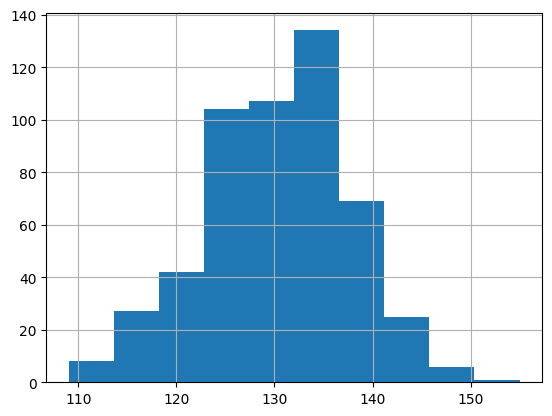

In [275]:
runtimes_excluding_zero = (movie_df[movie_df["Runtime"] != 0])["Runtime"]
runtimes_excluding_zero.hist()

It looks like the distribution of runtimes (excluding the 0 minute runtimes) above does not have a scewness to it and instead looks approximately bell shaped. Because of this, I will be choosing to impute the 0 minute runtimes with the mean imputation. Also, I want to note that when I calculate the mean runtime (excluding 0 minute runtimes), there is a possibility that I get a float and in that case, I will round that off to the nearest integer so my mean runtime will be an integer so when I impute it for the 0 minute runtimes, the runtime column will remain as an integer column.

In [276]:
mean_runtime_excluding_zero = runtimes_excluding_zero.mean()
mean_runtime_excluding_zero_rounded = round(mean_runtime_excluding_zero)

movie_df["Runtime"] = movie_df["Runtime"].apply(lambda x: mean_runtime_excluding_zero_rounded if x == 0 else x)

# **Error 2: Bunch Of Budget Values Seem To Have Been Recorded In Ones Instead Of In Millions**

I noticed that there seems to be a bunch of budget values that looks very suspicious if it were to be recorded **in millions**. For example I see a bunch of budget values over like 1000000 and if those were recorded in millions than that would be way too much. I noticed that either budget values recorded were less than 500 which is normal when recorded **in millions** or budget values recorded were over like 1000000 which is not normal and would be waaaay to much if it was recorded **in millions**. Most likely, the budget values that were over like 1000000 were recorded **in ones** and **not in millions** and the rest of the budget values which were less than 500 were recorded **in millions**.

To fix this, I am simply going to convert the budget values that were recorded over 1000000 which obviously was recorded **in ones** to what it would be if it were to be recorded **in millions** meaning I am simply just going to divide those by 1000000. For the budget values that were recorded less than 1000000, those were recorded less than 500 since as I mentioned earlier, budget values were either recorded over 1000000 or less than 500. And for those budget values I am just going to leave it as is since those were less than 500 which is the normal region if recorded **in millions**.

In [277]:
movie_df["Budget"] = movie_df["Budget"].apply(lambda x: (x / 1000000) if (x > 1000000) else x)
movie_df

,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,R1,R2,R3,Success
0,Love in the Inbox,126,1,2020,66.793869,73.543754,Winter,PG,Romantic Comedy,An unconvincing portrayal of suspense that fai...,An uninspired plotline that lacks coherence an...,A visually captivating masterpiece that mesmer...,False
1,Coffee Shop Serendipity,131,0,2020,46.678633,33.572003,Fall,PG,Romantic Comedy,A movie that feels disjointed and fails to con...,An attempt at humor that lacks cleverness and ...,A timeless classic that continues to enchant a...,False
2,The Wedding Date Dilemma,132,4,2000,36.391338,54.561523,Summer,PG,Romantic Comedy,An underwhelming cinematic effort with unconvi...,An emotionally resonant movie that connects un...,A cinematic triumph that surpasses boundaries ...,False
3,Heartstrings and Highways,132,1,2015,93.247317,59.714535,Winter,PG13,Romantic Comedy,A film that fails to resonate due to its lack ...,A beautifully crafted narrative that unfolds w...,An uninspired portrayal of drama that feels su...,False
4,Falling for Cupid,119,1,2015,92.130207,67.643810,Fall,PG13,Romantic Comedy,A movie that struggles to evoke any genuine em...,"A testament to the power of storytelling, leav...",An uplifting film that leaves a profound impac...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Shadow Strike,128,3,2021,64.897017,91.445593,Fall,PG,Action,Weak and contrived dialogue that lacks authent...,An overemphasis on spectacle over substance th...,Unremarkable cinematography that fails to crea...,False
536,Riot Protocol,123,1,2018,30.989354,46.045408,Summer,R,Action,A film that lingers in the memory.,A celebration of life and its intricacies.,A cinematic tour de force that enchants.,True
537,Deadlock Vendetta,121,1,2003,48.572549,63.660912,Summer,PG,Action,A lack of cohesion in the storytelling that ma...,An overly convoluted plot that confuses rather...,Flat and unconvincing performances that fail t...,False
538,Blade Runner Protocol,124,1,2007,136.468170,188.513344,Summer,R,Action,An evocative journey that captivates the soul.,"An absence of emotional depth, resulting in a ...",A triumph in storytelling and authenticity.,True


# **Error 3: 2 Movies With 100 Stars**

I also noticed that there are some movies that have like 100 stars which of course is not possible. I would like to now take a look at how many movies have 100 stars.

In [278]:
movie_df["Stars"].value_counts(dropna = False)

Stars
1      196
0      132
3      125
2       54
4       25
5        6
100      2
Name: count, dtype: int64

From the above output, we see that there are 2 movies that have 100 stars which accounts for approximately 0.37% of the data which is very small portion and we can assume that this error was completely random and accidental, so removing those rows does seem like a valid option. But at the same time an imputation technique can also work here and I would rather pick an imputation technique over removing those rows since if I remove those rows, then I will lose information which could be accurate and useful from the other columns for those rows.

I am planning on doing a hot-deck imputation to fix this by averaging the number of stars of movies that are similar in Budget and Promo to these 2 movies that have the 100 stars error and I will replace the number of stars for these 2 movies with the resulting average. First, I am going to see if the 2 movies in question have similar Budget and Promo in order to decide if I will replace the number of stars in these 2 movies with the same average or different averages. What I mean by this is if the 2 movies are not similar in Budget and Promo, then for one of the movies I will average the stars of all movies similar to this one movie in terms of budget and promo and replace this one movie's stars with the average, and for the other movie, I will do the same thing except I will be averaging the stars of movies similar in terms of budget and promo to this other movie and the resulting average will be different and I will use this resulting average to replace the number of stars for this other movie. Now, if the 2 movies in queston have similar Budget and Promo, then I can replace their stars with the same average.

In [279]:
movie_df[movie_df["Stars"] == 100]

,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,R1,R2,R3,Success
22,Cupid's Chaotic Comedy,136,100,2010,61.969754,32.502884,Spring,R,Romantic Comedy,An unconvincing portrayal of suspense that fai...,A lackluster attempt at storytelling with shal...,An uninspired movie that fails to connect with...,False
47,The Love Auction,117,100,2012,59.801772,32.294517,Fall,R,Romantic Comedy,An unconvincing attempt at storytelling with a...,A lackluster cinematic endeavor that fails to ...,An attempt at drama that lacks emotional reson...,False


From the output above we see that the 2 movies in question do indeed have similar budgets where one movie's budget is around $62 million and the other movie's budget is around $60 million and also the 2 movies have similar promos where both movies' promo is at around $32 million. So, I will use the same calculated average number of stars of similar movies to these 2 movies in terms of budget and promo and replace these 2 movies' stars with the same resulting average.

So, the way I will do this is I will get a collection of all movies with budget between $55 million and $65 million and promo between $30 million and $40 million (the collection **does not** include the 2 movies in question). Then I will calculate the average number of stars of all the movies in this collection and then replace the number of stars for these 2 movies in question with the calculated average.

In [280]:
movies_excluding_two_100_star_movies = movie_df[movie_df["Stars"] != 100]
similar_collection = movies_excluding_two_100_star_movies[(movies_excluding_two_100_star_movies["Budget"] >= 55.0) & (movies_excluding_two_100_star_movies["Budget"] <= 65.0) & (movies_excluding_two_100_star_movies["Promo"] >= 30.0) & (movies_excluding_two_100_star_movies["Promo"] <= 40.0)]

# Add safety check (same as Flask app)
if len(similar_collection) > 0:
    average_stars = similar_collection["Stars"].mean()
    rounded_average_stars = round(average_stars)
    movie_df["Stars"] = movie_df["Stars"].apply(lambda x: rounded_average_stars if x == 100 else x)
else:
    print("⚠️ No similar movies found for stars imputation")

# Data Exploration





Does Season have a stastically significant impact on a movie's success?

**p-value:** 0.005716268505111858

I am planning to do a chi square test for independence so making the appropriate contigency table.

In [281]:
contigency_table = pd.crosstab(movie_df["Season"], movie_df["Success"])
contigency_table

Success,False,True
Season,,
Fall,90,23
Spring,88,10
Summer,149,58
Winter,95,27


Did we meet the criteria in order to use a chi square test for independence?

- We are analyzing association between 2 categorical variables.
- Each of the 2 categorical variables we are analyzing association between has greater than or equal to 2 categories.
- We can assume the observations are independent.
- Expected frequencies for each cell is greater than or equal to 1 as shown in the output below when calculating P-value.
- Expected frequencies for more than 80% of the cells is greater than or equal to 5 as shown in the output below when calculating P-value.

Therefore, we have met the criteria for using a chi square test for independence.

Will be using a significance level, alpha = 0.05.

Null and Alternate Hypothesis:

- H0 = Season does not have an impact on a movie's success.
- HA = Season does have an impact on a movie's success.

Calculating P-value

In [282]:
res = sp.stats.chi2_contingency(contigency_table)
res

Chi2ContingencyResult(statistic=np.float64(12.55067851782634), pvalue=np.float64(0.0057162685051118595), dof=3, expected_freq=array([[ 88.30740741,  24.69259259],
       [ 76.58518519,  21.41481481],
       [161.76666667,  45.23333333],
       [ 95.34074074,  26.65925926]]))

Conclusion:

Reject the null hypothesis since the p-value is 0.005716268505111858 which is < alpha as there is statistically significant reason to believe that Season does have an impact on a movie's success.

Do seasons have a statistically significant difference in their distribution of content ratings?

**p-value:** 0.21507814500508263

I am planning to do a chi square test for independence so making the appropriate contigency table.

In [283]:
contigency_table = pd.crosstab(movie_df["Season"], movie_df["Rating"])
contigency_table

Rating,PG,PG13,R
Season,,,
Fall,42,38,33
Spring,33,35,30
Summer,64,71,72
Winter,55,39,28


Did we meet the criteria in order to use a chi square test for independence?

- We are analyzing association between 2 categorical variables.
- Each of the 2 categorical variables we are analyzing association between has greater than or equal to 2 categories.
- We can assume the observations are independent.
- Expected frequencies for each cell is greater than or equal to 1 as shown in the output below when calculating P-value.
- Expected frequencies for more than 80% of the cells is greater than or equal to 5 as shown in the output below when calculating P-value.

Therefore, we have met the criteria for using a chi square test for independence.

Will be using a significance level, alpha = 0.05.

Null and Alternate Hypothesis:

- H0 = There is no difference in distributions of content ratings across seasons
- HA = There is a difference in distributions of content ratings across seasons

Calculating P-value

In [284]:
res = sp.stats.chi2_contingency(contigency_table)
res

Chi2ContingencyResult(statistic=np.float64(8.327499849428124), pvalue=np.float64(0.21507814500508263), dof=6, expected_freq=array([[40.5962963 , 38.29444444, 34.10925926],
       [35.20740741, 33.21111111, 29.58148148],
       [74.36666667, 70.15      , 62.48333333],
       [43.82962963, 41.34444444, 36.82592593]]))

Conclusion:

We fail to reject the null hypothesis since the p-value is 0.21507814500508263 which is > alpha as we do not have statistically significant reason to believe that there is a difference in distributions of content ratings across seasons.

Who is the harshest critic (highest precent of negative reviews)?

**Critic:** R1

Creating 3 additional features to my movie_df called "R1_Sentiment", "R2_Sentiment", "R3_Sentiment" that has the sentiment (1 meaning positive or -1 meaning negative) for each review in R1, R2, R3 respectively

In [285]:
def movie_review_sentiment(movie_review):
    text_blob_analysis = TextBlob(movie_review)
    sentiment_result = text_blob_analysis.sentiment.polarity

    if (sentiment_result >= 0):
        return 1
    else:
        return -1

movie_df["R1_Sentiment"] = movie_df["R1"].apply(lambda x: movie_review_sentiment(x))
movie_df["R2_Sentiment"] = movie_df["R2"].apply(lambda x: movie_review_sentiment(x))
movie_df["R3_Sentiment"] = movie_df["R3"].apply(lambda x: movie_review_sentiment(x))
movie_df

,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,R1,R2,R3,Success,R1_Sentiment,R2_Sentiment,R3_Sentiment
0,Love in the Inbox,126,1,2020,66.793869,73.543754,Winter,PG,Romantic Comedy,An unconvincing portrayal of suspense that fai...,An uninspired plotline that lacks coherence an...,A visually captivating masterpiece that mesmer...,False,-1,-1,1
1,Coffee Shop Serendipity,131,0,2020,46.678633,33.572003,Fall,PG,Romantic Comedy,A movie that feels disjointed and fails to con...,An attempt at humor that lacks cleverness and ...,A timeless classic that continues to enchant a...,False,-1,-1,1
2,The Wedding Date Dilemma,132,4,2000,36.391338,54.561523,Summer,PG,Romantic Comedy,An underwhelming cinematic effort with unconvi...,An emotionally resonant movie that connects un...,A cinematic triumph that surpasses boundaries ...,False,1,1,1
3,Heartstrings and Highways,132,1,2015,93.247317,59.714535,Winter,PG13,Romantic Comedy,A film that fails to resonate due to its lack ...,A beautifully crafted narrative that unfolds w...,An uninspired portrayal of drama that feels su...,False,-1,1,-1
4,Falling for Cupid,119,1,2015,92.130207,67.643810,Fall,PG13,Romantic Comedy,A movie that struggles to evoke any genuine em...,"A testament to the power of storytelling, leav...",An uplifting film that leaves a profound impac...,False,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Shadow Strike,128,3,2021,64.897017,91.445593,Fall,PG,Action,Weak and contrived dialogue that lacks authent...,An overemphasis on spectacle over substance th...,Unremarkable cinematography that fails to crea...,False,-1,1,1
536,Riot Protocol,123,1,2018,30.989354,46.045408,Summer,R,Action,A film that lingers in the memory.,A celebration of life and its intricacies.,A cinematic tour de force that enchants.,True,1,1,1
537,Deadlock Vendetta,121,1,2003,48.572549,63.660912,Summer,PG,Action,A lack of cohesion in the storytelling that ma...,An overly convoluted plot that confuses rather...,Flat and unconvincing performances that fail t...,False,1,1,-1
538,Blade Runner Protocol,124,1,2007,136.468170,188.513344,Summer,R,Action,An evocative journey that captivates the soul.,"An absence of emotional depth, resulting in a ...",A triumph in storytelling and authenticity.,True,1,-1,1


Calculating proportion of reviews from R1 that are negative:

In [286]:
percent_of_negative_reviews_for_R1 = (movie_df["R1_Sentiment"].value_counts(dropna=False))[-1] / 540
percent_of_negative_reviews_for_R1

np.float64(0.5481481481481482)

Calculating proportion of reviews from R2 that are negative:

In [287]:
percent_of_negative_reviews_for_R2 = (movie_df["R2_Sentiment"].value_counts(dropna=False))[-1] / 540
percent_of_negative_reviews_for_R2

np.float64(0.4351851851851852)

Calculating proportion of reviews from R3 that are negative:

In [288]:
percent_of_negative_reviews_for_R3 = (movie_df["R3_Sentiment"].value_counts(dropna=False))[-1] / 540
percent_of_negative_reviews_for_R3

np.float64(0.35185185185185186)

Conclusion:

From the above outputs, it seems that R1 has the highest proportion of negative reviews at 0.5481481481481482. That means that R1 has the highest percent of negative reviews. So, therefore, R1 is the harshest critic.

What is the covariance between promotional budget and the filming budget?

**Cov:** 1907.0543228223632

In [289]:
covariance = movie_df["Promo"].cov(movie_df["Budget"])
covariance

np.float64(1907.0543228223635)

# Data Visualization

<Axes: xlabel='Stars', ylabel='Budget'>

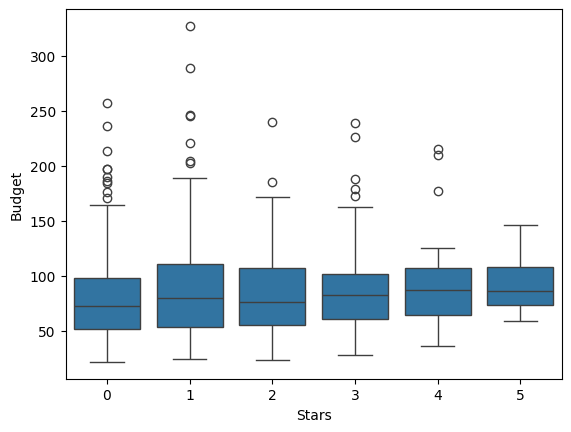

In [290]:
sns.boxplot(x="Stars", y="Budget", data=movie_df)

C:\Users\madha\AppData\Local\Temp\ipykernel_22876\864955290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_budget_df["Year"] = pd.to_datetime(year_budget_df["Year"], format="%Y")


<Axes: xlabel='Year', ylabel='Budget'>

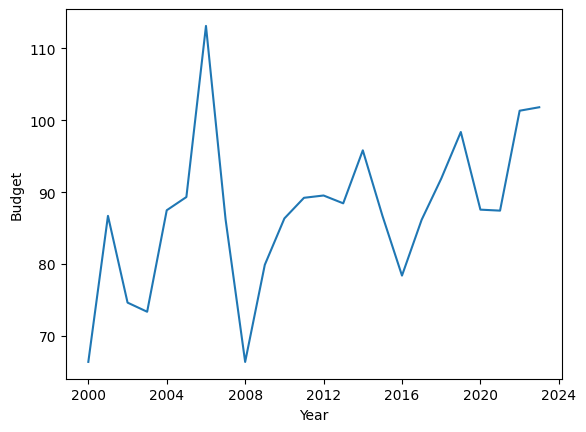

In [291]:
# converting my Year column's type to datetime
year_budget_df = movie_df[["Year", "Budget"]]
year_budget_df["Year"] = pd.to_datetime(year_budget_df["Year"], format="%Y")

sns.lineplot(x="Year", y="Budget", data=year_budget_df, estimator="mean", errorbar=None)

# Feature Engineering

I created the features R1_Sentiment, R2_Sentiment, R3_Sentiment which I have done before in the section where I was determining the harshiest critic. Please refer to that section. Below, I also decided to one hot encode the Season, Rating, and Genre columns and added those to my movie_df.

In [292]:
one_hot_encode_season = pd.get_dummies(movie_df["Season"])
one_hot_encode_rating = pd.get_dummies(movie_df["Rating"])
one_hot_encode_genre = pd.get_dummies(movie_df["Genre"])
movie_df = movie_df.join(one_hot_encode_season)
movie_df = movie_df.join(one_hot_encode_rating)
movie_df = movie_df.join(one_hot_encode_genre)
movie_df

,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,R1,...,Summer,Winter,PG,PG13,R,Action,Drama,Fantasy,Romantic Comedy,Science fiction
0,Love in the Inbox,126,1,2020,66.793869,73.543754,Winter,PG,Romantic Comedy,An unconvincing portrayal of suspense that fai...,...,False,True,True,False,False,False,False,False,True,False
1,Coffee Shop Serendipity,131,0,2020,46.678633,33.572003,Fall,PG,Romantic Comedy,A movie that feels disjointed and fails to con...,...,False,False,True,False,False,False,False,False,True,False
2,The Wedding Date Dilemma,132,4,2000,36.391338,54.561523,Summer,PG,Romantic Comedy,An underwhelming cinematic effort with unconvi...,...,True,False,True,False,False,False,False,False,True,False
3,Heartstrings and Highways,132,1,2015,93.247317,59.714535,Winter,PG13,Romantic Comedy,A film that fails to resonate due to its lack ...,...,False,True,False,True,False,False,False,False,True,False
4,Falling for Cupid,119,1,2015,92.130207,67.643810,Fall,PG13,Romantic Comedy,A movie that struggles to evoke any genuine em...,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Shadow Strike,128,3,2021,64.897017,91.445593,Fall,PG,Action,Weak and contrived dialogue that lacks authent...,...,False,False,True,False,False,True,False,False,False,False
536,Riot Protocol,123,1,2018,30.989354,46.045408,Summer,R,Action,A film that lingers in the memory.,...,True,False,False,False,True,True,False,False,False,False
537,Deadlock Vendetta,121,1,2003,48.572549,63.660912,Summer,PG,Action,A lack of cohesion in the storytelling that ma...,...,True,False,True,False,False,True,False,False,False,False
538,Blade Runner Protocol,124,1,2007,136.468170,188.513344,Summer,R,Action,An evocative journey that captivates the soul.,...,True,False,False,False,True,True,False,False,False,False


Displaying the columns in movie_df that were cutoff from the last output.

In [293]:
movie_df[["R2", "R3", "Success", "R1_Sentiment", "R2_Sentiment", "R3_Sentiment", "Spring", "Fall"]]

,R2,R3,Success,R1_Sentiment,R2_Sentiment,R3_Sentiment,Spring,Fall
0,An uninspired plotline that lacks coherence an...,A visually captivating masterpiece that mesmer...,False,-1,-1,1,False,False
1,An attempt at humor that lacks cleverness and ...,A timeless classic that continues to enchant a...,False,-1,-1,1,False,True
2,An emotionally resonant movie that connects un...,A cinematic triumph that surpasses boundaries ...,False,1,1,1,False,False
3,A beautifully crafted narrative that unfolds w...,An uninspired portrayal of drama that feels su...,False,-1,1,-1,False,False
4,"A testament to the power of storytelling, leav...",An uplifting film that leaves a profound impac...,False,1,1,1,False,True
...,...,...,...,...,...,...,...,...
535,An overemphasis on spectacle over substance th...,Unremarkable cinematography that fails to crea...,False,-1,1,1,False,True
536,A celebration of life and its intricacies.,A cinematic tour de force that enchants.,True,1,1,1,False,False
537,An overly convoluted plot that confuses rather...,Flat and unconvincing performances that fail t...,False,1,1,-1,False,False
538,"An absence of emotional depth, resulting in a ...",A triumph in storytelling and authenticity.,True,1,-1,1,False,False


# Modeling

Create a model of your choice.

**Model type choosen:** Random Forest

In [294]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

models = {
    'Decision Tree (Tuned)': DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=3,
        random_state=0
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=0
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=0
    )
}

# Testing

**Model accuracy:** 0.815

In [295]:
def train_model_exact_flask():
    # Define feature columns
    feature_columns = [
        "Runtime", "Stars", "Year", "Budget", "Promo", 
        "R1_Sentiment", "R2_Sentiment", "R3_Sentiment",
        "Fall", "Spring", "Summer", "Winter",
        "PG", "PG13", "R",
        "Action", "Drama", "Fantasy", "Romantic Comedy", "Science fiction"
    ]
    
    # Ensure all feature columns exist
    missing_columns = []
    for col in feature_columns:
        if col not in movie_df.columns:
            movie_df[col] = 0
            missing_columns.append(col)
    
    features = movie_df[feature_columns]
    target = movie_df["Success"].astype(int)  # Ensure Success is integer (0/1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.1, random_state=0, shuffle=True
    )
    
    # Feature scaling for numerical features
    scaler = StandardScaler()
    numerical_features = ["Runtime", "Year", "Budget", "Promo"]
    
    # Scale training data
    X_train_scaled = X_train.copy()
    X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
    
    # Scale test data
    X_test_scaled = X_test.copy()
    X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])
    
    # Try the earlier trio and pick the best 
    models = {
        'Decision Tree (Tuned)': DecisionTreeClassifier(
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=3,
            random_state=0
        ),
        'Random Forest': RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            min_samples_split=5,
            random_state=0
        ),
        'Gradient Boosting': GradientBoostingClassifier(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            random_state=0
        )
    }
    
    best_model = None
    best_score = 0
    best_name = ""
    model_results = {}
    
    # Train and evaluate each model (on scaled features)
    for name, model in models.items():
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        cv_mean = cv_scores.mean()
        
        model.fit(X_train_scaled, y_train)
        
        test_pred = model.predict(X_test_scaled)
        test_accuracy = accuracy_score(y_test, test_pred)
        
        model_results[name] = {
            'cv_score': cv_mean,
            'test_accuracy': test_accuracy,
            'model': model
        }
        
        if test_accuracy > best_score:
            best_score = test_accuracy
            best_model = model
            best_name = name
    
    
    
    # Use the best model
    final_model = best_model
    final_model_name = best_name
    final_model_results = model_results
    
    # Calculate performance metrics for the best model
    y_pred = final_model.predict(X_test_scaled)
    final_accuracy = accuracy_score(y_test, y_pred)
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    
    print(f"\n🎯 Final Model: {final_model_name}")
    print(f"📊 Final Accuracy: {final_accuracy:.3f}")
    
    return final_model, final_accuracy, confusion_matrix_result, y_test, y_pred
    
final_model, final_accuracy, confusion_matrix_result, y_test, y_pred = train_model_exact_flask()


🎯 Final Model: Random Forest
📊 Final Accuracy: 0.815


**False negative rate:** 18.52% (used formula: FN / (FP + TN + FN + TP))

**False positive rate:** 0.00% (used formula: FP / (FP + TN + FN + TP))

Note: The outputed confusion matrix below is in the form:

- [TN, FP]
- [FN, TP]

In [296]:
confusion_matrix_result

array([[40,  0],
       [10,  4]])

**Most important feature:** Budget


In [297]:
# Feature Importance using the best model
if hasattr(final_model, 'feature_importances_'):
    importances_of_each_feature_list = final_model.feature_importances_
    index_of_highest_importance_value = np.argmax(importances_of_each_feature_list)
    name_of_most_important_feature = feature_columns[index_of_highest_importance_value]
    
    print(f"🎯 Most Important Feature: {name_of_most_important_feature}")
    print(f"📊 Feature Importance Values:")
    
    # Show all feature importances
    feature_importance_df = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': importances_of_each_feature_list
    }).sort_values('Importance', ascending=False)
    
    print(feature_importance_df)
else:
    print(f"⚠️ {final_model.__class__.__name__} does not support feature importance analysis")

🎯 Most Important Feature: Budget
📊 Feature Importance Values:
            Feature  Importance
3            Budget    0.144767
4             Promo    0.142739
1             Stars    0.134253
5      R1_Sentiment    0.131039
0           Runtime    0.120764
2              Year    0.093943
6      R2_Sentiment    0.025062
14                R    0.024970
15           Action    0.024143
16            Drama    0.021656
13             PG13    0.019405
11           Winter    0.016529
12               PG    0.016512
10           Summer    0.016381
7      R3_Sentiment    0.015999
9            Spring    0.014315
18  Romantic Comedy    0.013813
8              Fall    0.010143
17          Fantasy    0.007089
19  Science fiction    0.006479
